In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from scipy import stats
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('realEstate.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## Data Preprocessing

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Now performing data type convesion on columns within a pandas dataframe called df

df['price']     = df['price'].astype('int64')
df['bedrooms']  = df['bedrooms'].astype('int64')
df['floors']    = df['floors'].astype('int64')
df['street']    = df['street'].astype('string')
df['city']      = df['city'].astype('string')
df['statezip']  = df['statezip'].astype('string')
df['country']   = df['country'].astype('string')

In [8]:
df.insert(1, "year", df.date.dt.year)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   year           4600 non-null   int64         
 2   price          4600 non-null   int64         
 3   bedrooms       4600 non-null   int64         
 4   bathrooms      4600 non-null   float64       
 5   sqft_living    4600 non-null   int64         
 6   sqft_lot       4600 non-null   int64         
 7   floors         4600 non-null   int64         
 8   waterfront     4600 non-null   int64         
 9   view           4600 non-null   int64         
 10  condition      4600 non-null   int64         
 11  sqft_above     4600 non-null   int64         
 12  sqft_basement  4600 non-null   int64         
 13  yr_built       4600 non-null   int64         
 14  yr_renovated   4600 non-null   int64         
 15  street         4600 n

In [10]:
df.drop_duplicates()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,2014,308166,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,2014,534333,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,2014,416904,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2014,203400,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


#### Removing rows of price 0 

In [11]:
(df.price == 0).sum()


49

In [12]:
df['price'].replace(0, np.nan, inplace = True)
df.dropna(inplace=True)

In [13]:
df.shape

(4551, 19)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4551.0,2014.000000,0.000000,2014.0,2014.00,2014.00,2014.0,2014.0
price,4551.0,557905.885959,563929.874935,7800.0,326264.00,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.00,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.75,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.00,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.00,7680.00,10978.0,1074218.0
floors,4551.0,1.459240,0.552355,1.0,1.00,1.00,2.0,3.0
waterfront,4551.0,0.006592,0.080932,0.0,0.00,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.00,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.00,3.00,4.0,5.0


In [15]:
df.isnull().sum()

date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [16]:
df.nunique(axis = 0)  

date               70
year                1
price            1740
bedrooms           10
bathrooms          26
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

### Adding New Column Age of House

In [17]:
df['age'] = df['year'] - df['yr_built']

# How Price is distributed

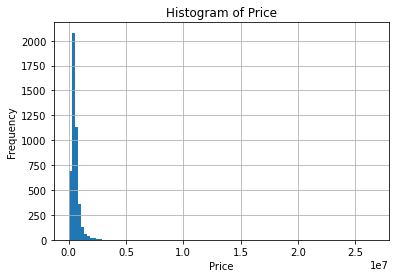

In [18]:
df['price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()

# Removing Outliers from Price

In [19]:
(df['price'] > 0.3e7).sum()

9

In [20]:
df = df[~(df['price'] > 0.3e7)]

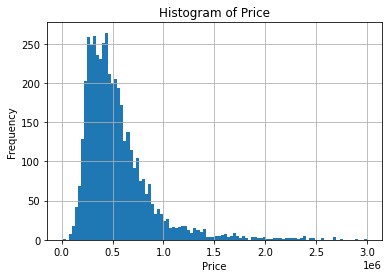

In [21]:
df['price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

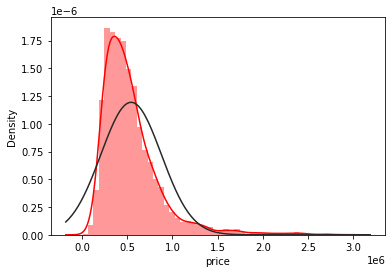

In [22]:
sns.distplot(df['price'],color="red",kde=True,fit=stats.norm)

### With the help of Q-Q plot we see whether the terget variable is Normally Distributed or not, as Linear mostly like Normally Distributed Data.

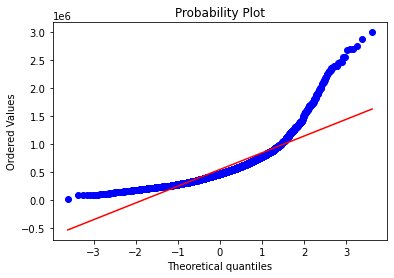

In [23]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

### As the target variable (price) is very skewed, we apply log-transformation on target varibale to make it Normally Distributed

In [24]:
df['price'] = np.log1p(df['price'])

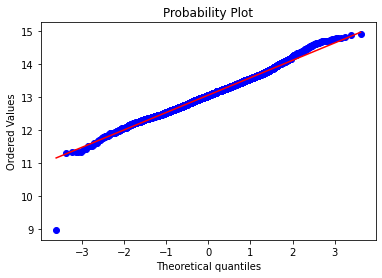

In [25]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

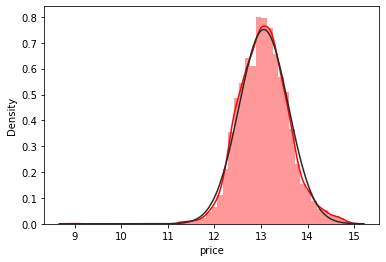

In [26]:
sns.distplot(df['price'],color="red",kde=True,fit=stats.norm)

### HeatMap for Correlation

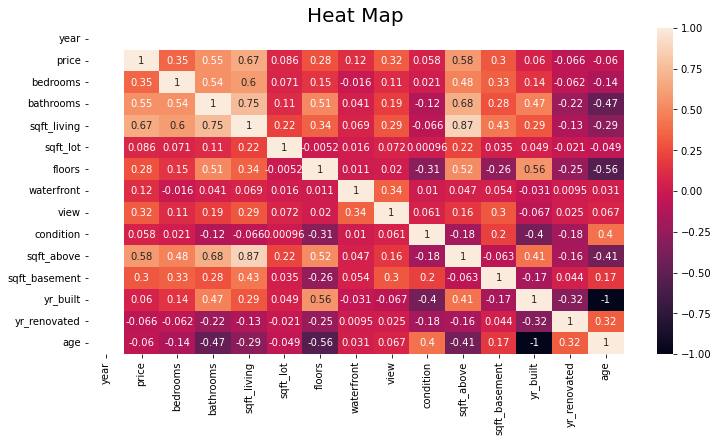

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

# Histogram plot of variables

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

<Figure size 864x432 with 0 Axes>

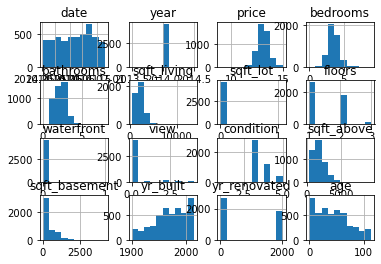

In [28]:
plt.figure(figsize=(12, 6))
df.hist()

### Applying One-Hot encoding on City and then reducing Dimension using PCA

In [29]:
from sklearn.decomposition import PCA
X = pd.get_dummies(df.city, prefix='City')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['city_pca1'] = X_pca[:, 0]
df['city_pca2'] = X_pca[:, 1]

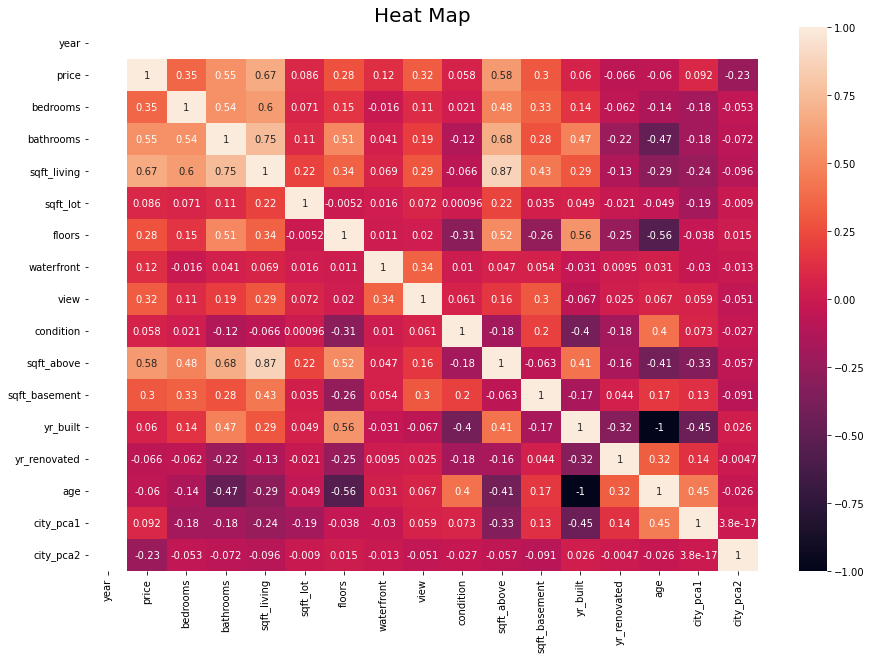

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [31]:
df.columns

Index(['date', 'year', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'age', 'city_pca1', 'city_pca2'],
      dtype='object')

### Dropping Unnecessary variables

In [32]:
df=df.drop(['date', 'street', 'statezip', 'country','year','city','age'],axis=1)

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,-0.335753,-0.024843
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,0.673959,0.003172
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,-0.358174,-0.039227
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,-0.401021,-0.577253
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,-0.380177,-0.079207


In [34]:
df.shape

(4542, 15)

In [35]:
df.to_csv('outfile_v4.csv', index=False)

#### Make Train-Test split

In [36]:
x = df.drop("price", axis=1)
y = pd.DataFrame(df["price"])

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state =42)

In [38]:
print("Number of columns in X_train:", X_train.shape[1])
print("Number of columns in x:", x.shape[1])

Number of columns in X_train: 14
Number of columns in x: 14


In [39]:
X_train.shape

(3179, 14)

In [40]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
1918,3,2.50,1710,2300,2,0,0,3,1570,140,2005,0,-0.380177,-0.079207
819,3,2.50,1870,5874,2,0,0,3,1870,0,2005,0,-0.358174,-0.039227
1503,4,1.75,2330,4000,2,0,0,5,1300,1030,1924,1956,0.673959,0.003172
2600,3,2.00,1410,7998,1,0,0,4,1410,0,1940,2001,-0.305767,-0.015696
817,3,2.25,1990,7340,2,0,0,3,1990,0,1984,0,-0.332630,-0.023549


In [41]:
X_test.shape

(1363, 14)

In [42]:
params = {
    'colsample_bytree': 1,
    'gamma': 5,
    'learning_rate': 0.5,
    'max_depth': 2,
    'n_estimators': 100,
    'subsample': 0.2
}

In [43]:
# Create an XGBoost model with the specified hyperparameters
xgbr = XGBRegressor(
    colsample_bytree=params['colsample_bytree'],
    gamma=params['gamma'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    n_estimators=params['n_estimators'],
    subsample=params['subsample']
)

#xgbr = XGBRegressor()

                

In [44]:
xgbr.fit(X_train, Y_train,)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
Y_pred = xgbr.predict(X_test)

In [46]:
# Make predictions
y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)

In [47]:
# Training set performance
from sklearn.metrics import  mean_absolute_error, mean_squared_error

model_train_mae = mean_absolute_error(Y_train, y_train_pred) # Calculate MAE

mse_train = mean_squared_error(Y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))



In [48]:
# Test set performance

model_test_mae = mean_absolute_error(Y_test, y_test_pred) # Calculate MAE

mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred))




In [49]:
  
print('Model performance for Training set')

print("MAE: {:.4f}".format(model_train_mae))
print("MSE: {:.4f}".format(mse_train))
print("RMSE: {:.4f}".format(rmse_train))

Model performance for Training set
MAE: 0.2638
MSE: 0.1179
RMSE: 0.3433


In [50]:
print('Model performance for Test set')

print("MAE : {:.4f}".format(model_test_mae))
print("MSE: {:.4f}".format(mse_test))
print("RMSE: {:.4f}".format(rmse_test))

Model performance for Test set
MAE : 0.2737
MSE: 0.1230
RMSE: 0.3507
